In [205]:
"""
This is the function used for calculating the Mean Absolute deviation (MAD)
"""
def MAD (Im3, Im4):
    mad = 0
    for i in range(16):
        for j in range(16):
            mad = mad + abs(Im4[i][j]- Im3[i][j])
    return (mad/(16*16))

In [220]:
"""
This function computes the three step process
"""
#Question 1)

def val(first,second):
    plt.imshow(first,cmap='gray')
    for i in range(15,len(first)-1,16):
        plt.plot([0,len(first[0])-1],[i-1,i-1],'k-',lw = 0.5)
        
    for i in range(15,len(first[0])-1,16):
        plt.plot([i-1,i-1],[0,len(first)-1],'k-',lw = 0.5)

    img3=np.zeros([16,16])
    img4=np.zeros([16,16])
    tempimg=np.zeros([16,16])
    t=[]
    a=[]
    b=[]
    c=[]
    

    #STEP -1
    
    min1=float('inf')
    for i in range (9):                        #taking the matrix as 9*11
        for j in range (11): 
            index1=0
            index2=0
            for m in range (-4,5,4):           #searching for +- 4 pixels around the current block
                for n in range (-4,5,4):
                    x=False
                    for k in range (16):        
                        for l in range (16):
                            img3[k][l]=first[i*16+k][j*16+l]     #calculating the 16*16 matrix
                            if(i*16+k+m >= 0 and j*16+l+n >= 0 and i*16+k+m < 144 and j*16+l+n < 176):
                                x=True
                                img4[k][l]=second[i*16+k+m][j*16+l+n]
                    if(x):
                        d=MAD(img3,img4)      #computing the MAD value of the two blocks
                        if(d<min1):           #finding the minimum index value 
                            min1=d;
                            index1=m
                            index2=n
                       

            #STEP-2
            min1=float('inf')
            h,s=index1,index2
            for m in range (-2,3,2):            #searching for +- 2 pixels around the current block
                for n in range (-2,3,2):
                    x=False
                    for k in range (16):        #calculating the 16*16 matrix
                        for l in range (16):
                            img3[k][l]=first[i*16+k+h][j*16+s+l]
                            if(i*16+k+m+h >= 0 and j*16+l+n+s >= 0 and i*16+k+m+h < 144 and j*16+l+n+s < 176):
                                x=True
                                img4[k][l]=second[i*16+k+m+h][j*16+l+n+s]
                    if(x):
                        d=MAD(img3,img4)
                        if(d<min1):
                            min1=d;
                            index1=h+m
                            index2=s+n
                            

            #STEP-3
            min1=float('inf')
            h,s=index1,index2
            for m in range (-1,2,1):           #searching for +- 2 pixels around the current block
                for n in range (-1,2,1):
                    x=False
                    for k in range (16):        #calculating the 16*16 matrix
                        for l in range (16):
                            img3[k][l]=first[i*16+k+h][j*16+s+l]
                            if(i*16+k+m+h >= 0 and j*16+l+n+s >= 0 and i*16+k+m+h < 144 and j*16+l+n+s < 176):
                                x=True
                                img4[k][l]=second[i*16+k+m+h][j*16+l+n+s]
                    if(x):
                        d=MAD(img3,img4)
                        if(d<min1):
                            min1=d;
                            index1=h+m
                            index2=s+n
                            tempimg=img4
                            
            #t.append(index1)
            #t.append(index2)
            
            #plotting the arrows
            plt.arrow(j*16 + 7,i*16 + 7,index1,index2)
            
    plt.title("Plotting the Motion vector")         
    plt.show()

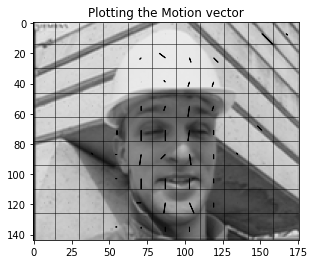

In [221]:
"""
Importing the images
"""
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
first = mpimg.imread('first.png')
second = mpimg.imread('second.png')

#Scaling the images so that we get the values in the range of 0-255
def scale(img):
    for i in range (len (img)):
        for j in range (len(img[0])):
            img[i][j]=img[i][j]*255;
    return img

scale(first)
scale(second)
    
    
#Question 2
#Plotting the motion vector
(val(first,second))


In [225]:
"""
This is the function used for calculating the Mean absolute deviation for question 3
"""
def val1(first,second):

    img3=np.zeros([16,16])
    img4=np.zeros([16,16])
    img9=np.zeros([144,176])
    tempimg=np.zeros([16,16])
    t=[]
    a=[]
    b=[]
    c=[]
    
    #STEP-1
    min1=float('inf')
    for i in range (9):                             #taking the matrix as 9*11
        for j in range (11): 
            index1=0
            index2=0
            for m in range (-4,5,4):                #searching for +- 4 pixels around the current block
                for n in range (-4,5,4):
                    x=False
                    for k in range (16):        
                        for l in range (16):
                            img3[k][l]=second[i*16+k][j*16+l]     #calculating the 16*16 matrix
                            if(i*16+k+m >= 0 and j*16+l+n >= 0 and i*16+k+m < 144 and j*16+l+n < 176):
                                x=True
                                img4[k][l]=first[i*16+k+m][j*16+l+n]
                    if(x):
                        d=MAD(img3,img4)           #computing the MAD value of the two blocks
                        if(d<min1):                #finding the minimum index value
                            min1=d;
                            index1=m
                            index2=n
                       

                    
            #STEP-2
            min1=float('inf')
            h,s=index1,index2
            for m in range (-2,3,2):           #searching for +- 2 pixels around the current block
                for n in range (-2,3,2):
                    x=False
                    for k in range (16):       #calculating the 16*16 matrix
                        for l in range (16):
                            img3[k][l]=second[i*16+k+h][j*16+s+l]
                            if(i*16+k+m+h >= 0 and j*16+l+n+s >= 0 and i*16+k+m+h < 144 and j*16+l+n+s < 176):
                                x=True
                                img4[k][l]=first[i*16+k+m+h][j*16+l+n+s]
                    if(x):
                        d=MAD(img3,img4)       #computing the MAD value of the two blocks
                        if(d<min1):
                            min1=d;            #finding the minimum index value
                            index1=h+m
                            index2=s+n
                            

            #STEP-3
            min1=float('inf')
            h,s=index1,index2
            for m in range (-1,2,1):            #searching for +- 1 pixels around the current block
                for n in range (-1,2,1):
                    x=False
                    for k in range (16):         #calculating the 16*16 matrix
                        for l in range (16):
                            img3[k][l]=second[i*16+k+h][j*16+s+l]
                            if(i*16+k+m+h >= 0 and j*16+l+n+s >= 0 and i*16+k+m+h < 144 and j*16+l+n+s < 176):
                                x=True
                                img4[k][l]=first[i*16+k+m+h][j*16+l+n+s]
                    if(x):
                        d=MAD(img3,img4)
                        if(d<min1):
                            min1=d;
                            index1=h+m
                            index2=s+n
                            tempimg=img3
                            
            #t.append(index1)
            #t.append(index2)

            for k in range (16):
                for l in range (16):
                    img9[i*16+k][j*16+l]=tempimg[k][l]
                    
    plt.show()
    plt.title("Motion compensated predicted frame")
    plt.imshow(img9,cmap='gray')


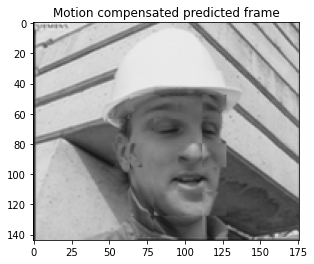

In [226]:
#Question 3)
#Generating the motion compensated predicted frame using the motion vectors and the first frame.
val1(first,second)

In [204]:
#Question 4)
#Computing the error between the second frame and its motion compensated predicted version
sum=0
for i in range (144):
    for j in range (176):
        sum=sum+abs(second[i][j]-img9[i][j])
sum=sum/(144*176)
print ("The error between the second frame and its motion compensated predicted version is:",sum)

The error between the second frame and its motion compensated predicted version is: 3.2328756313131315
